![Citrine banner](https://raw.githubusercontent.com/CitrineInformatics/community-tools/master/templates/fig/citrine_banner_2.png)

# Intro to machine learning

*Authors: Eric Muckley*


This notebook provides a basic introduction to machine learning (ML) and
sequential learning (SL) in Python. It demonstrates an example application of
a SL learning problem:

**How can we predict the value of a material property from other material properties?**

**How can we predict which experiment to run next?**

the best processing consitions for a material in order to
optimize one of its properties?**


## Learning outcomes

* Perform basic machine learning in Python
* Perform basic sequential learning



## Import packages

In [1]:
import numpy as np # for matrix / array operations
import pandas as pd # for storing data in tables
import matplotlib.pyplot as plt # for plotting

## Create our data

In [2]:
data = {
    'name': ['Zinc bromide', 'Benzo(a)fluorene', 'Lead(II) iodide', 'Lead(II) oxide', 'Strontium fluoride', 'Copper(I) chloride', 'Vanadium(V) oxide', 'Trichloroethylene', 'Copper(II) perchlorate', 'Cobalt(II) fluoride', 'Sodium iodide', 'Methyl isopropyl ketone', 'Chlorotrifluoromethane', 'Zinc sulfate', 'Radium bromide', 'Sodium hypochlorite', 'Cyclopentane', 'Mercury(II) iodide', 'Lithium hydroxide', 'Lead(II) fluoride'],
    'formula': ['ZnBr$_{2}$', 'C$_{17}$H$_{12}$', 'PbI$_{2}$', 'PbO', 'SrF$_{2}$', 'CuCl', 'V$_{2}$O$_{5}$', 'C$_{2}$HCl$_{3}$', 'Cu(ClO$_{4}$)$_{2}$', 'CoF$_{2}$', 'NaI', 'C$_{5}$H$_{10}$O', 'CClF$_{3}$', 'ZnSO$_{4}$', 'RaBr$_{2}$', 'NaClO', 'C$_{5}$H$_{10}$', 'HgI$_{2}$', 'LiOH', 'PbF$_{2}$'],
    'molarmass': ['225.198', '216.277', '461.01', '223.20', '125.62', '98.999', '181.8800', '141.4', '262.447', '96.93', '149.89', '86.13', '104.46', '161.47', '385.782', '74.442', '70.1', '454.40', '23.95', '245.20'],
    'meltingpoint': ['394', '189.5', '402', '888', '1477', '426', '690', '-73', '82', '1217', '661', '-92', '-181', '680', '728', '18', '-93.9', '259', '462', '824'],
    'density': ['4.20', '0.819', '6.16', '9.53', '4.24', '4.145', '3.357', '1.46', '2.225', '4.46', '3.67', '0.803', '1.526', '3.54', '5.79', '1.11', '0.751', '6.36', '1.46', '8.445'],
    'boilingpoint': ['697', '405', '872', '1477', '2460', '1490', '1750', '87.2', '120', '1400', '1304', '92', '-81.5', '740', '900', '101', '49.2', '350', '924', '1293'],
    'solubility': ['311', '0.000045', '0.044', '0.017', '0.039', '0.0062', '0.8', '1.280', '146', '1.4', '158.7', '6', '0.009', '57.7', '70.6', '29.3', '156', '0.006', '12.7', '0.057']}

df = pd.DataFrame(data)

print('Data shape: {} rows, {} columns'.format(df.shape[0], df.shape[1]))
df.head(20)

Data shape: 20 rows, 7 columns


name              formula molarmass meltingpoint  \
0              Zinc bromide           ZnBr$_{2}$   225.198          394   
1          Benzo(a)fluorene     C$_{17}$H$_{12}$   216.277        189.5   
2           Lead(II) iodide            PbI$_{2}$    461.01          402   
3            Lead(II) oxide                  PbO    223.20          888   
4        Strontium fluoride            SrF$_{2}$    125.62         1477   
5        Copper(I) chloride                 CuCl    98.999          426   
6         Vanadium(V) oxide       V$_{2}$O$_{5}$  181.8800          690   
7         Trichloroethylene     C$_{2}$HCl$_{3}$     141.4          -73   
8    Copper(II) perchlorate  Cu(ClO$_{4}$)$_{2}$   262.447           82   
9       Cobalt(II) fluoride            CoF$_{2}$     96.93         1217   
10            Sodium iodide                  NaI    149.89          661   
11  Methyl isopropyl ketone     C$_{5}$H$_{10}$O     86.13          -92   
12   Chlorotrifluoromethane           CClF$_{3}$    104.46         -181   
13             Zinc sulfate           ZnSO$_{4}$    161.47          680   
14           Radium bromide           RaBr$_{2}$   385.782          728   
15      Sodium hypochlorite                NaClO    74.442           18   
16             Cyclopentane      C$_{5}$H$_{10}$      70.1        -93.9   
17       Mercury(II) iodide            HgI$_{2}$    454.40          259   
18        Lithium hydroxide                 LiOH     23.95          462   
19        Lead(II) fluoride            PbF$_{2}$    245.20          824   

   density boilingpoint solubility  
0     4.20          697        311  
1    0.819          405   0.000045  
2     6.16          872      0.044  
3     9.53         1477      0.017  
4     4.24         2460      0.039  
5    4.145         1490     0.0062  
6    3.357         1750        0.8  
7     1.46         87.2      1.280  
8    2.225          120        146  
9     4.46         1400        1.4  
10    3.67         1304      158.7  
11   0.803           92          6  
12   1.526        -81.5      0.009  
13    3.54          740       57.7  
14    5.79          900       70.6  
15    1.11          101       29.3  
16   0.751         49.2        156  
17    6.36          350      0.006  
18    1.46          924       12.7  
19   8.445         1293      0.057

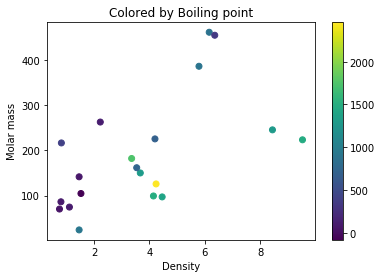

In [3]:
plt.scatter(df['density'].astype(float),
            df['molarmass'].astype(float),
            c=df['boilingpoint'].astype(float))
plt.xlabel('Density')
plt.ylabel('Molar mass')
plt.title('Colored by Boiling point')
plt.colorbar()
plt.show()

## Import the ML model from the scikit-learn library

For our experiment, we want a supervised regression model.
Here we look at the random forest regression from the scikit-learn package:
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

In [4]:
from sklearn.ensemble import RandomForestRegressor

## Prepare data for ML model

In [5]:
# input values
X = df[[
        'molarmass',
        'boilingpoint',
        'meltingpoint',
        'density']].values.astype(float)

# output (target) values
y = df['solubility'].values.astype(float)

print('Inputs: {}'.format(X))
print()
print('Outputs: {}'.format(y))

Inputs: [[ 2.25198e+02  6.97000e+02  3.94000e+02  4.20000e+00]
 [ 2.16277e+02  4.05000e+02  1.89500e+02  8.19000e-01]
 [ 4.61010e+02  8.72000e+02  4.02000e+02  6.16000e+00]
 [ 2.23200e+02  1.47700e+03  8.88000e+02  9.53000e+00]
 [ 1.25620e+02  2.46000e+03  1.47700e+03  4.24000e+00]
 [ 9.89990e+01  1.49000e+03  4.26000e+02  4.14500e+00]
 [ 1.81880e+02  1.75000e+03  6.90000e+02  3.35700e+00]
 [ 1.41400e+02  8.72000e+01 -7.30000e+01  1.46000e+00]
 [ 2.62447e+02  1.20000e+02  8.20000e+01  2.22500e+00]
 [ 9.69300e+01  1.40000e+03  1.21700e+03  4.46000e+00]
 [ 1.49890e+02  1.30400e+03  6.61000e+02  3.67000e+00]
 [ 8.61300e+01  9.20000e+01 -9.20000e+01  8.03000e-01]
 [ 1.04460e+02 -8.15000e+01 -1.81000e+02  1.52600e+00]
 [ 1.61470e+02  7.40000e+02  6.80000e+02  3.54000e+00]
 [ 3.85782e+02  9.00000e+02  7.28000e+02  5.79000e+00]
 [ 7.44420e+01  1.01000e+02  1.80000e+01  1.11000e+00]
 [ 7.01000e+01  4.92000e+01 -9.39000e+01  7.51000e-01]
 [ 4.54400e+02  3.50000e+02  2.59000e+02  6.36000e+00]
 [

### Define and fit the ML model

In [6]:
# define model: random forest regression
model = RandomForestRegressor()#max_depth=100)

# fit the model
model.fit(X, y)

# calculate fit
fit = model.predict(X)

# calculate model accuracy
score = model.score(X, y)


print('model score:')
print(score)
print()


print('Feature importances:')
print(model.feature_importances_)

# plot results
plt.scatter(np.arange(len(X)), y, s=50, c='k', label='data')
plt.plot(fit, c='r', label='fit')
plt.title('Model of solubility')
plt.xlabel('Point number')
plt.ylabel('Solubility')
plt.legend()
plt.show()

model score:
0.7948555974220193

Feature importances:
[0.28544616 0.12911743 0.1795748  0.4058616 ]


### Use model to make prediction at untested condition

In [7]:
# specify a new condition with the same variables we used for training
new_condition = [[50, 100, 26.5, 41]]  # [[molarmass, boilingpoint, meltingpoint, density]]

# make a prediction of the target variable at the new condition
new_prediction = model.predict(new_condition)

print('Predicted solubility:')
print(new_prediction)

Predicted solubility:
[42.3856362]


## Use model to make predictions across many untested conditions

Input grid to simulate:
[[  70.          300.          300.          108.        ]
 [  70.          300.          377.77777778  108.        ]
 [  70.          300.          455.55555556  108.        ]
 [  70.          300.          533.33333333  108.        ]
 [  70.          300.          611.11111111  108.        ]
 [  70.          300.          688.88888889  108.        ]
 [  70.          300.          766.66666667  108.        ]
 [  70.          300.          844.44444444  108.        ]
 [  70.          300.          922.22222222  108.        ]
 [  70.          300.         1000.          108.        ]
 [  70.          400.          300.          108.        ]
 [  70.          400.          377.77777778  108.        ]
 [  70.          400.          455.55555556  108.        ]
 [  70.          400.          533.33333333  108.        ]
 [  70.          400.          611.11111111  108.        ]
 [  70.          400.          688.88888889  108.        ]
 [  70.          400.          7

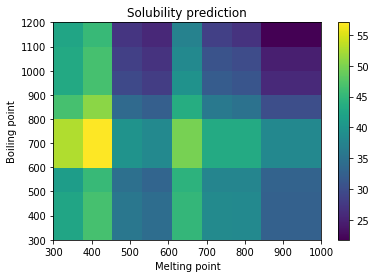

In [8]:
# create ranges that each variable should sample in the grid
meltingpoint_range = np.linspace(300, 1000, num=10)
boilingpoint_range = np.linspace(300, 1200, num=10)

molarmass = 70 # keep constant for visualization purposes
density = 108 # keep constant for visualization purposes

# create grid
meltingpoint_grid, boilingpoint_grid = np.meshgrid(
    meltingpoint_range,
    boilingpoint_range)
molarmass_grid = np.ones_like(meltingpoint_grid) * molarmass
density_grid = np.ones_like(meltingpoint_grid) * density

# get all grid points into an array
grid = np.column_stack((molarmass_grid.ravel(),
                        boilingpoint_grid.ravel(),
                        meltingpoint_grid.ravel(),
                        density_grid.ravel()))

print('Input grid to simulate:')
print(grid)

# ------ get prediction of solubility at each point on the grid ---------
predictions = model.predict(grid)
print('\nPredictions at each point on grid:')
print(predictions)

predictions_grid = predictions.reshape(
    len(meltingpoint_grid), len(boilingpoint_grid))
plt.pcolormesh(meltingpoint_grid, boilingpoint_grid, predictions_grid)
plt.colorbar()
plt.title('Solubility prediction')
plt.xlabel('Melting point')
plt.ylabel('Boiling point')
plt.show()

### Find input variables which produced optimal target variable

In [9]:
# index of optimal conductivity
max_idx = np.argmax(predictions)
min_idx = np.argmin(predictions)

# find optimal experimental conditions
max_cond = grid[max_idx]
min_cond = grid[min_idx]

print('Predicted conditions for maximum solubility:')
print(max_cond)

print('\nPredicted conditions for minimum solubility:')
print(min_cond)

Predicted conditions for maximum solubility:
[ 70.         700.         377.77777778 108.        ]

Predicted conditions for minimum solubility:
[  70.         1200.          922.22222222  108.        ]


## Conclusion

In this notebook we saw how to
* format a dataset for machine learning
* define a machine learning model
* fit (train) a machine learning model
* use the model to predict new values

If we were conducting experiments (including simulations), we would now use the predictions of the ML model to help us determine which experiments to run next. Repeating this process iteratively is how we would carry out sequential learning.